# Project Studi Case : Indonesia Happines Rank Report

# Understanding Business : 

Dataset yang digunakan yaitu [world Happiness Report 2021](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021). membangun Visualisasi Data dan model machine learning untuk memprediksi Analytic Indonesia Happines Rank Report 2021.

# Smart Question

1. Specific:
- Apa faktor-faktor khusus yang paling berkontribusi terhadap tingkat kebahagiaan di Indonesia menurut laporan World Happiness Report 2021?

2. Measurable:
- Berapa skor kebahagiaan rata-rata yang diberikan oleh warga Indonesia dalam laporan World Happiness Report 2021, dan bagaimana perbandingannya dengan skor kebahagiaan rata-rata global?

3. Action-oriented:
- Bagaimana pemerintah Indonesia dapat menggunakan temuan dari laporan World Happiness Report 2021 untuk meningkatkan kebijakan dan program yang bertujuan untuk meningkatkan tingkat kebahagiaan warga negara?

4. Relevant:
- Seberapa relevan tingkat kebahagiaan di Indonesia dalam konteks global, terutama dalam hal hubungannya dengan stabilitas sosial, kesejahteraan ekonomi, dan perkembangan sosial?

5. Time-bound:
- Apakah ada tren yang signifikan dalam tingkat kebahagiaan di Indonesia dalam beberapa tahun terakhir yang dapat diidentifikasi dari data dalam laporan World Happiness Report 2021?



# Importing Library

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import missingno as ms
import warnings
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')

In [76]:
# # Auto Exploratory Data Analysis
# from pandas_profiling import ProfileReport

# # AutoML
# from autogluon.core.utils.loaders import load_zip
# from autogluon.multimodal import MultiModalPredictor
# from autogluon.multimodal.data.infer_types import infer_column_types
# from autogluon.tabular import TabularPredictor
# from autogluon.features.generators import AutoMLPipelineFeatureGenerator
# from autogluon.tabular import FeatureMetadata

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from ucimlrepo import fetch_ucirepo
# from langchain_community.llms import Ollama 

# Data Preparation

Gathering Data

In [77]:
df_2021 = pd.read_csv("data\world-happiness-report-2021.csv")

df_past = pd.read_csv("data\world-happiness-report.csv")

In [78]:
df_2021.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [79]:
SEA = df_2021[df_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()

print("Negara-negara yang ada dalam ASEAN terdiri dibawah ini : \n")

pd.DataFrame(SEA)

Negara-negara yang ada dalam ASEAN terdiri dibawah ini : 



,0
0,Singapore
1,Thailand
2,Philippines
3,Vietnam
4,Malaysia
5,Indonesia
6,Laos
7,Cambodia
8,Myanmar


Assesing Data

Infomation Tabel Indonesia Happiness Rank Report

In [80]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [81]:
print("DataFrame Indonesia Happiness Rank Report : ")
print(df_2021.isna().sum())

DataFrame Indonesia Happiness Rank Report : 
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                        

- Terdapat 541,909 entri dalam dataset ini.
- Kolom Deskripsi memiliki 1,454 nilai yang hilang (null).
- Kolom CustomerID memiliki 135,080 nilai yang hilang (null), yang berarti sebagian besar transaksi tidak terkait dengan pelanggan tertentu.
- Data ini memiliki beberapa tipe data, termasuk objek (string), integer, float, dan datetime.

In [82]:
print('Jumlah Duplikasi : ', df_2021.duplicated().sum())

Jumlah Duplikasi :  0


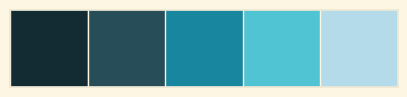

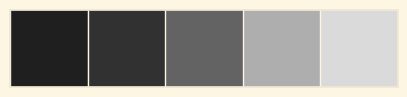

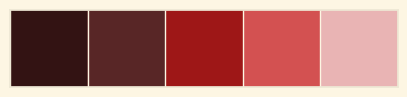

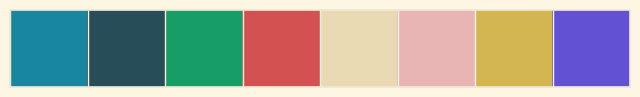

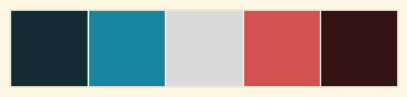

In [83]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [84]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpl.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

th = [0, 0.2, 0.5, 0.8, 1]
cdict = NonLinCdict(th, colors_blue)
cdiv = NonLinCdict(th, colors_div)

cm = LinearSegmentedColormap('blue', cdict)
cm_div = LinearSegmentedColormap('div', cdiv)

In [85]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = colors_dark[0]

Descriptive analysis Statistic

In [86]:
df_2021.describe().style.background_gradient(cmap="RdPu")

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.000000,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [87]:
df_2021['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

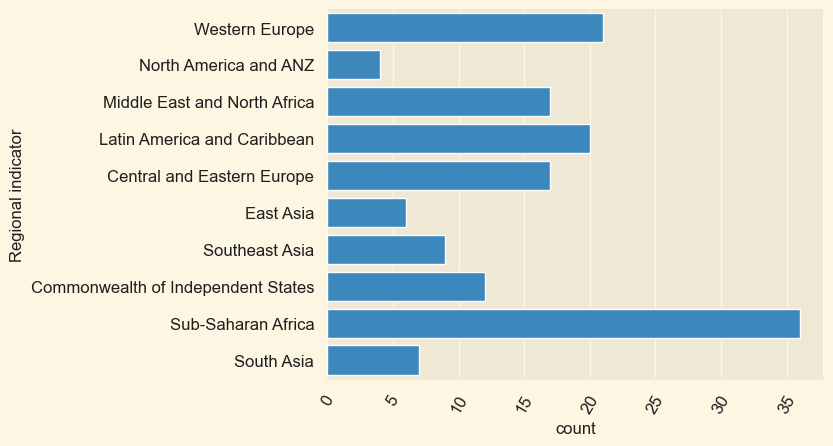

In [88]:
sns.countplot(df_2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

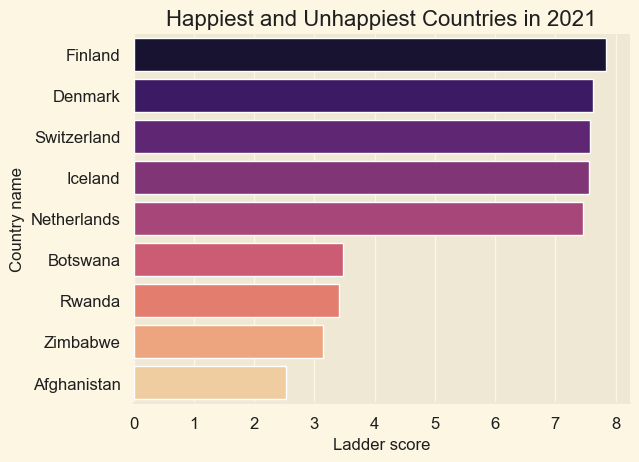

In [89]:
df2021_happiest_unhappiest = df_2021[(df_2021.loc[:, "Ladder score"] > 7.4) | (df_2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=df2021_happiest_unhappiest, palette = "magma")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

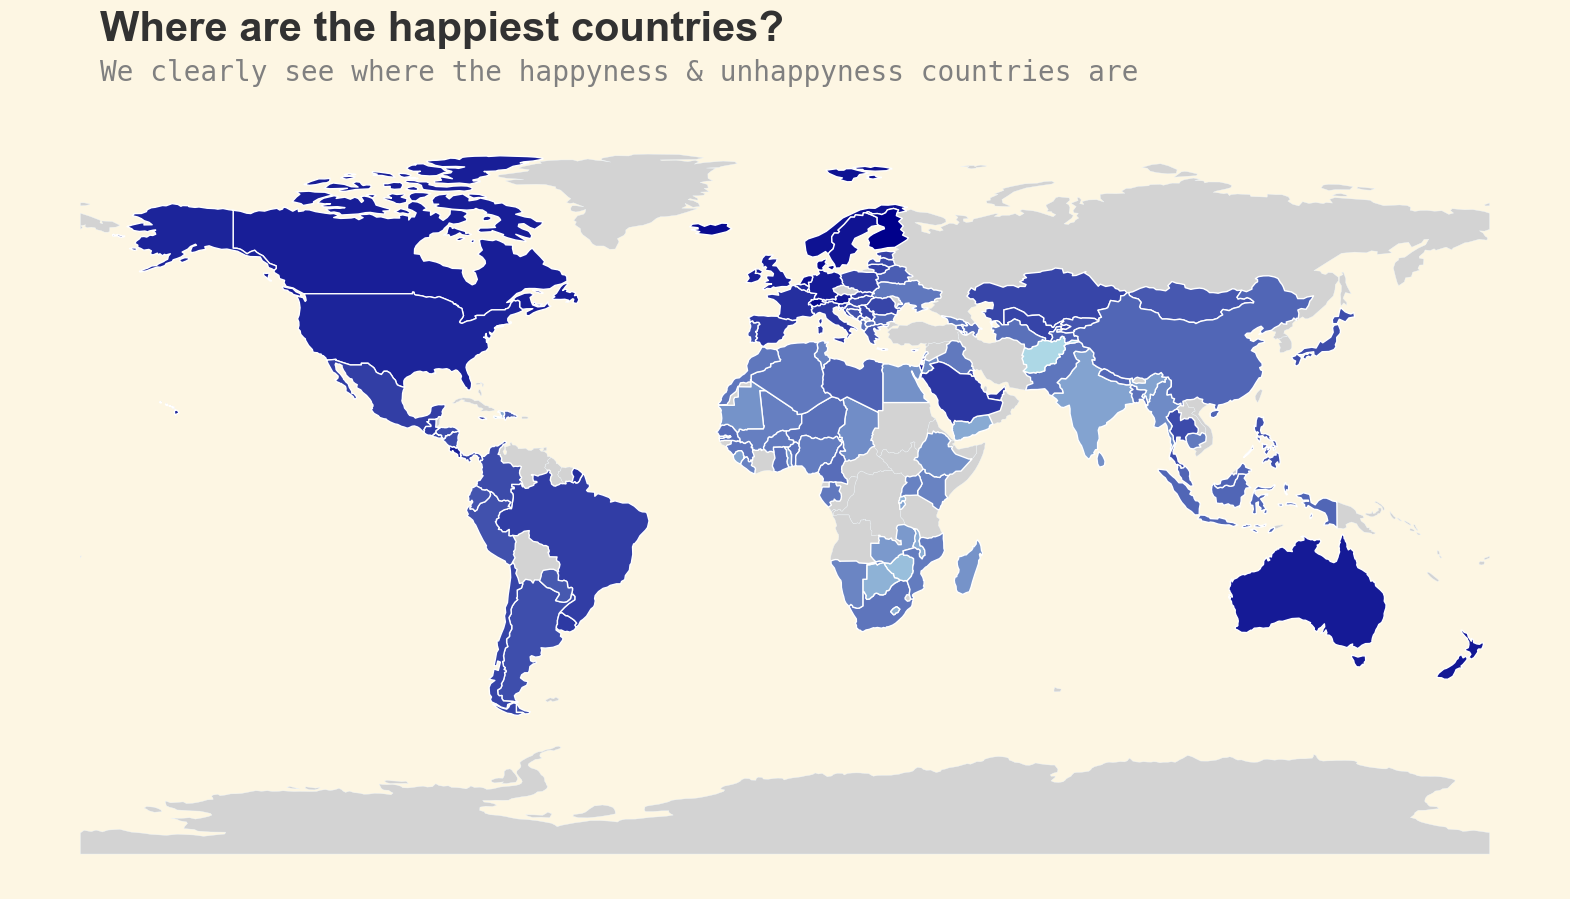

In [90]:
import geopandas as gpd
import matplotlib.colors as mcolors
import pycountry
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_2021 is your DataFrame
geo_temp = df_2021.copy()

def alpha3code(column):
    CODE = []
    for country in column:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# Create a column for code 
geo_temp['CODE'] = alpha3code(geo_temp['Country name'])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge = pd.merge(world, geo_temp, on='CODE')

low_c = "#ADD8E6"  # Light Blue
high_c = "#00008B"  # Dark Blue
background_color = "#F0F8FF"  # Alice Blue (untuk latar belakang)
cmap = mcolors.LinearSegmentedColormap.from_list("", [low_c, high_c])

ax = world.plot(figsize=(20, 15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='Ladder score', figsize=(20, 15), legend=False, cmap=cmap, ax=ax)

ax.text(-175, 112, 'Where are the happiest countries?', fontsize=30, fontweight='bold', fontfamily='sans-serif', color='#323232')
ax.text(-175, 102, 'We clearly see where the happyness & unhappyness countries are', color='gray', fontfamily='monospace', fontsize=20)

plt.show()


In [91]:
# low_c = '#dd4124'
# high_c = '#009473'
# plt.rcParams["font.family"] = "monospace"

# fig = plt.figure(figsize=(6,3),dpi=150)
# gs = fig.add_gridspec(1, 1)
# gs.update(wspace=0.2, hspace=0.4)
# ax0 = fig.add_subplot(gs[0, 0])

# background_color = "#fafafa"
# fig.patch.set_facecolor(background_color) # figure background color
# ax0.set_facecolor(background_color) 

# ax0.text(1.167,0.85,"2021 World Happiness Index",color='#323232',fontsize=28, fontweight='bold', fontfamily='sanserif',ha='center')
# ax0.text(1.13,-0.35,"stand-out facts",color='lightgray',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

# ax0.text(0,0.4,"Finland",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
# ax0.text(0,0.1,"Happiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

# ax0.text(0.77,0.4,"9 of top 10",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
# ax0.text(0.75,0.1,"in Europe",color='gray',fontsize=15, fontfamily='monospace',ha='center')

# ax0.text(1.5,0.4,"7 of bottom 10",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
# ax0.text(1.5,0.1,"in Africa",color='gray',fontsize=15, fontfamily='monospace',ha='center')

# ax0.text(2.25,0.4,"Afghanistan",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
# ax0.text(2.25,0.1,"Unhappiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

# ax0.set_yticklabels('')
# ax0.set_xticklabels('')
# ax0.tick_params(axis='both',length=0)

# for s in ['top','right','left','bottom']:
#     ax0.spines[s].set_visible(False)
    
# import matplotlib.lines as lines
# l1 = lines.Line2D([0.15, 1.95], [0.67, 0.67], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
# fig.lines.extend([l1])
# l2 = lines.Line2D([0.15, 1.95], [0.07, 0.07], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
# fig.lines.extend([l2])
    
# plt.show()

In [92]:
fig = px.choropleth(df_past.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()



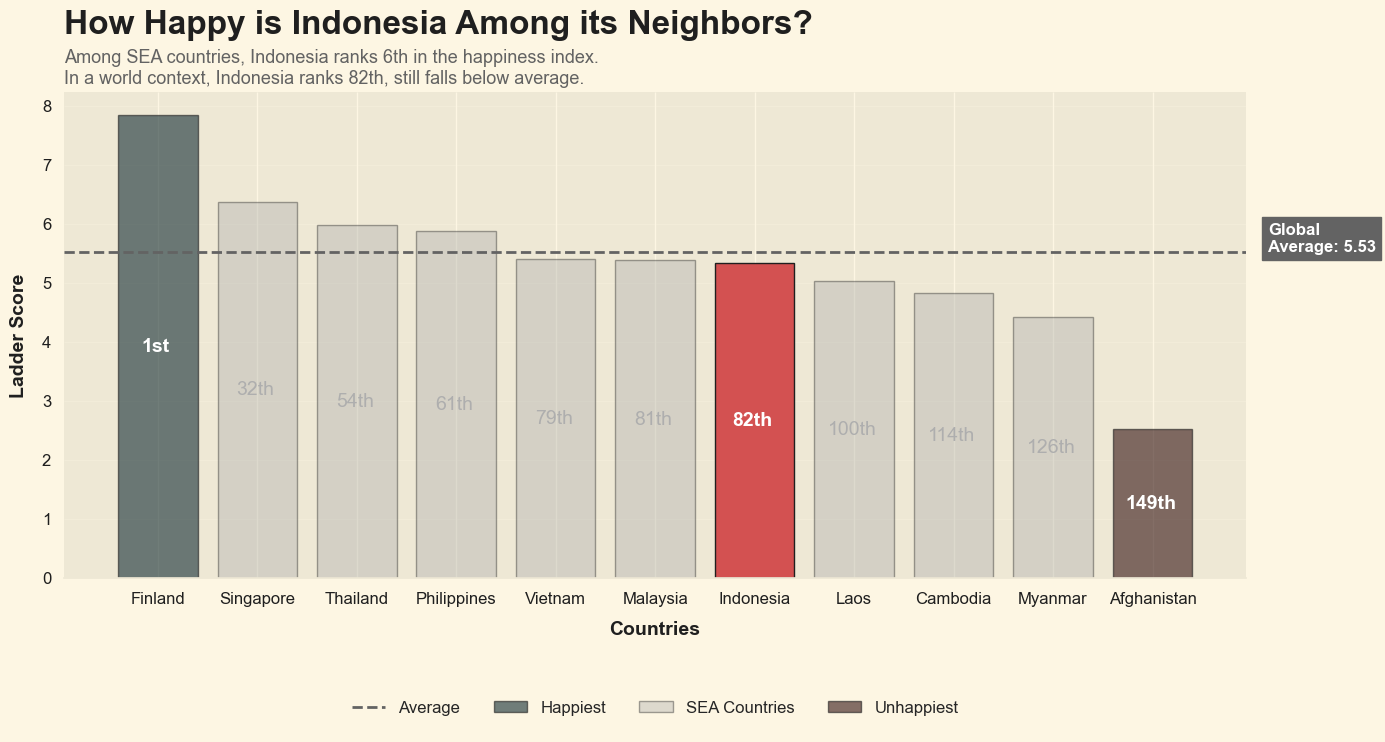

In [93]:
df = df_2021[df_2021['Country name'].isin(SEA)]
df_2021_top = df_2021.iloc[0:1]
df_2021_bot = df_2021.iloc[-1]
mean_score = df_2021['Ladder score'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(df_2021_top['Country name'], df_2021_top['Ladder score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Ladder score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(df_2021_bot['Country name'], df_2021_bot['Ladder score'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Indonesia settings
bars1[5].set_alpha(1)
bars1[5].set_color(colors_red[3])
bars1[5].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 5 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="How Happy is Indonesia Among its Neighbors?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 6th in the happiness index.\nIn a world context, Indonesia ranks 82th, still falls below average.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()